## Libraries

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from warnings import filterwarnings as filt 
import os, re 


filt('ignore')
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (15, 9)
!pip install yfinance
!pip install yahoofinancials
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Setting up Root 

In [3]:
## path from jaabir
#root = "/content/drive/MyDrive/carbon_fp"
## others 
root = "/content/drive/MyDrive/carbon_fp"

os.chdir(root)
!pwd

/content/drive/.shortcut-targets-by-id/1DgRO5rnQXFelTUgGehdbK37oSYScbLQg/carbon_fp


Reading the data

In [4]:
data = [i for i in os.listdir('datasets') if i.endswith('.csv')]
data

['public_cfp.csv', 'tpr_cfp.csv', 'sus_cfp.csv', 'final_data.csv']

In [5]:
path = os.path.join('datasets', data[-1])
df = pd.read_csv(path)
df.head()

,id,year_of_reporting,product_name,company,country/region,commodity_industry,commodity_sector,product_weight,cfp,carbon_intensity
0,10056.0,2014,frosted flakes(r) cereal,Kellogg Company,usa,"food, beverage & tobacco",food & beverage,0.7485,2.00,2.67
1,10056.0,2015,"frosted flakes, 23 oz, produced in lancaster, ...",Kellogg Company,usa,food & beverage processing,food & beverage,0.7485,2.00,2.67
2,10222.0,2013,office chair,KNOLL INC,usa,capital goods,comm. equipm. & capital goods,20.6800,72.54,3.51
3,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1488.00,13.53
4,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1818.00,16.53


In [ ]:
df.shape

(4219, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4219 entries, 0 to 4218
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  866 non-null    float64
 1   year_of_reporting   4219 non-null   int64  
 2   product_name        4219 non-null   object 
 3   company             866 non-null    object 
 4   country/region      4219 non-null   object 
 5   commodity_industry  4219 non-null   object 
 6   commodity_sector    4219 non-null   object 
 7   product_weight      866 non-null    float64
 8   cfp                 4219 non-null   float64
 9   carbon_intensity    866 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 329.7+ KB


Basic Visualizations

In [ ]:
print(f'Number of countries : {df["country/region"].unique().shape[0]}')

Number of countries : 123


In [ ]:
px.density_heatmap(df.isnull(), title = 'null values heatmap')

In [ ]:
# px.pie()
nulls = df.isnull().sum() / df.shape[0]
nulls = pd.DataFrame(nulls, columns = ['percentage'])
px.pie(nulls.iloc[1:], values = 'percentage', names = nulls.index[1:], title = 'Null values percentage')

Top products producing highest carbon emission 


In [ ]:
dets = sorted(df[['product_name', 'cfp']].drop_duplicates(subset = 'product_name').values.tolist(), reverse = False, key = lambda x : x[1])[:20]
dets = np.array(dets)
dets = pd.DataFrame({
    'pname' : dets[:, 0],
    'cfp'   : dets[:, 1]
})
px.bar(dets, x = 'pname', y = 'cfp', title = 'Top 20 products producing highest carbon emission')

In [ ]:
dets = sorted(df[['product_name', 'cfp', 'commodity_sector']].drop_duplicates(subset = 'product_name').values.tolist(), reverse = False, key = lambda x : x[1])
dets = np.array(dets)
dets = pd.DataFrame({
    'pname' : dets[:, 0],
    'cfp'   : dets[:, 1],
    'sector': dets[:, 2]
})
px.bar(dets[dets.sector.str.contains('food')].iloc[-20:], x = 'pname', y = 'cfp', title = 'Top 20 food products producing highest carbon emission')

Top countries producing the highest carbon emission 

In [ ]:
# dets = sorted(df[['product_name', 'cfp', 'commodity_sector', 'country/region']].drop_duplicates(subset = 'product_name').values.tolist(), reverse = False, key = lambda x : x[1])
dets = sorted([[ind, np.sum(rdf.cfp)] for ind, rdf in df.groupby('country/region')], reverse = False, key = lambda x : x[1])
dets = np.array(dets)
dets = pd.DataFrame({
    'country' : dets[:, 0],
    'cfp'   : dets[:, 1],
})
px.bar(dets.iloc[-20:], x = 'country', y = 'cfp', title = 'Top 20 countries producing highest carbon emission')

In [ ]:
df[(df['commodity_sector'] == 'food & beverage') & (df.year_of_reporting == 2014)].head()

,id,year_of_reporting,product_name,company,country/region,commodity_industry,commodity_sector,product_weight,cfp,carbon_intensity
0,10056.0,2014,frosted flakes(r) cereal,Kellogg Company,usa,"food, beverage & tobacco",food & beverage,0.7485,2.0000,2.67
76,1085.0,2014,sugar,Associated British Foods,united kingdom,"food, beverage & tobacco",food & beverage,1000.0000,650.0000,0.65
101,12348.0,2014,"carling brewed in the uk, 24 440ml cans in 4 p...",Molson Coors Brewing Company,usa,"food, beverage & tobacco",food & beverage,12.0290,3.0700,0.26
103,12348.0,2014,"carling brewed in the uk, 24 568ml cans in 4 p...",Molson Coors Brewing Company,usa,"food, beverage & tobacco",food & beverage,15.5300,2.0519,0.13
104,12348.0,2014,"coors light brewed in the uk, 24 500ml cans in...",Molson Coors Brewing Company,usa,"food, beverage & tobacco",food & beverage,13.6700,3.7320,0.27


In [ ]:
# dets = sorted(df[['product_name', 'cfp', 'commodity_sector', 'country/region']].drop_duplicates(subset = 'product_name').values.tolist(), reverse = False, key = lambda x : x[1])
dets = sorted([[ind, np.sum(rdf.cfp)] for ind, rdf in df.groupby('country/region')], reverse = False, key = lambda x : x[1])
dets_ = []
for cunt, _ in dets:
  rdf = df[(df['country/region'] == cunt) & (df['commodity_sector'] == 'food & beverage')]
  if rdf.shape[0] > 0:
    rdf = rdf.sort_values(by = "cfp", ascending = False).iloc[0]
    dets_.append([cunt, rdf.cfp, f"{rdf.product_name} - ({cunt})"])
dets = np.array(dets_)
dets = pd.DataFrame({
    'country' : dets[:, 0],
    'cfp'   : dets[:, 1],
    'name'  : dets[:, 2]
})
px.bar(dets.iloc[-20:], x = 'name', y = 'cfp', title = 'Top 20 countries producing food products with highest carbon emission')

Top 3 country with large varieties of food & beverages items 

In [ ]:
dets = [[ind, rdf[rdf.commodity_sector == 'food & beverage'].shape[0]] for ind, rdf in df.groupby('country/region')]
for cunt, count in sorted(dets, reverse = True, key = lambda x : x[1])[:3]:
  print(cunt, count )

italy 543
uk 301
usa 258


In [ ]:
import plotly.figure_factory as ff

dets = df[df.commodity_sector == 'food & beverage']
hist_data = [
    dets[dets['country/region'] == 'italy']['cfp'].values,
    dets[dets['country/region'] == 'uk']['cfp'].values,
    dets[dets['country/region'] == 'usa']['cfp'].values,
]

group_labels = ['Italy', 'UK', 'USA']

ff.create_distplot(hist_data, group_labels, bin_size=.2)

Correlation matrix for :- 
- product weight
- carbon intensity
- carbon footprint

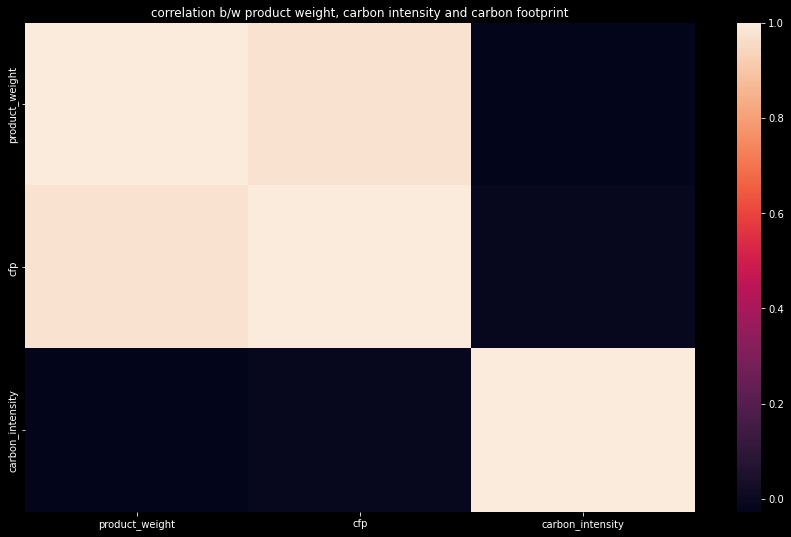

In [ ]:
corr = df[['product_weight',	'cfp',	'carbon_intensity']].corr()
sns.heatmap(corr)
plt.title('correlation b/w product weight, carbon intensity and carbon footprint');

# Experiments

In [ ]:
df.head()

,id,year_of_reporting,product_name,company,country/region,commodity_industry,commodity_sector,product_weight,cfp,carbon_intensity
0,10056.0,2014,frosted flakes(r) cereal,Kellogg Company,usa,"food, beverage & tobacco",food & beverage,0.7485,2.00,2.67
1,10056.0,2015,"frosted flakes, 23 oz, produced in lancaster, ...",Kellogg Company,usa,food & beverage processing,food & beverage,0.7485,2.00,2.67
2,10222.0,2013,office chair,KNOLL INC,usa,capital goods,comm. equipm. & capital goods,20.6800,72.54,3.51
3,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1488.00,13.53
4,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1818.00,16.53


> ## Exp-1

**Hypothesis** : people gravitate towards company's which have less carbon emission/carbon footprint

**Measurement** : analysis of products which have less carbon emission and group their company


In [8]:
comp_df = df.dropna(subset = ['company'])
dets = sorted([[ind, rdf.cfp.sum()] for ind, rdf in comp_df.groupby('company')], reverse = False, key = lambda x : x[-1])
dets = np.array(dets)
dets = pd.DataFrame({
    'company' : dets[:, 0],
    'cfp'     : dets[:, 1]
})

px.bar(dets.iloc[:5], x = 'company', y = 'cfp', title = 'Top 5 companies producing low carbon emission for their products')

Text(0.5, 1.0, 'Count of companies with low carbon emissions')

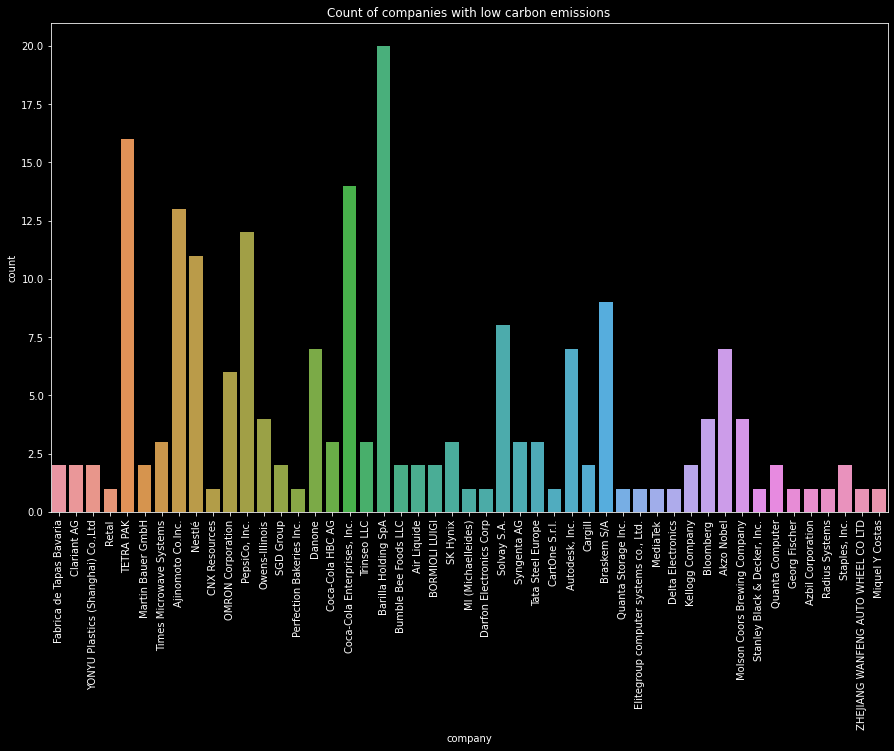

In [13]:
df_exp_1 = df.dropna(subset = ['company'])

dets_exp1 = sorted(df_exp_1[['company', 'cfp', 'year_of_reporting']].values.tolist(), reverse = False, key = lambda x : x[1])[:200]
dets_exp1 = np.array(dets_exp1)
dets_exp1 = pd.DataFrame({
    'company' : dets_exp1[:, 0],
    'cfp'     : dets_exp1[:,1],
    'yor'     : dets_exp1[:,2]
})
ax = sns.countplot(dets_exp1.company)
ax.tick_params(axis='x', rotation=90)
plt.title('Count of companies with low carbon emissions')

### We picked 3 companies to work on our hypothesis
- Kellogg company
- Logitech
- Pepsi

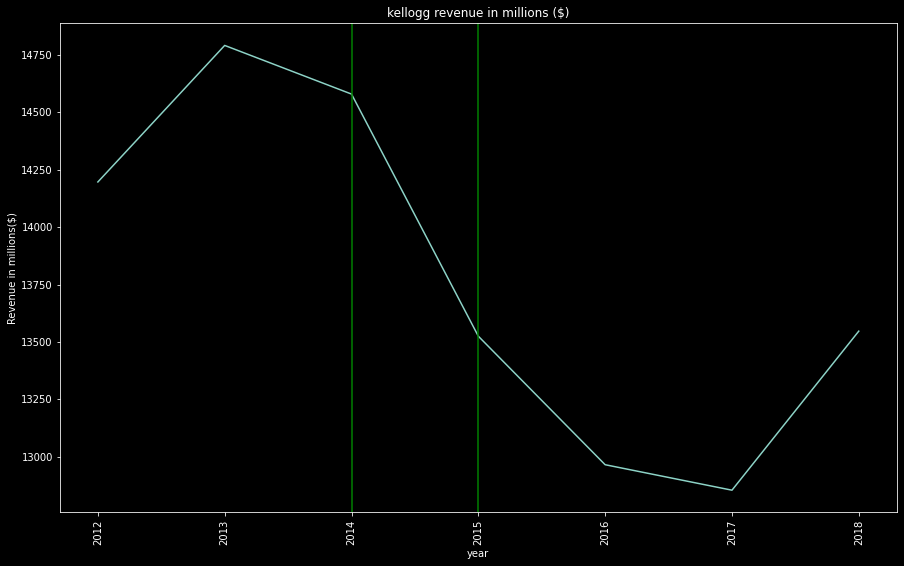

In [9]:
#Kellogg Company

ll = [13547,
12854,
12965,
13525,
14580,
14792,
14197]

ll = ll[::-1]
kellog_dict = { 'year' : ["2012", "2013", "2014", "2015", "2016", "2017", "2018"],
                 'Revenue in millions($)' : ll}
df_kel = pd.DataFrame(kellog_dict)
ax = sns.lineplot(df_kel.year, df_kel.iloc[:,1])
plt.title('kellogg revenue in millions ($)')
for yr in ['2014', '2015']:
  ax.axvline(yr,color ="green")
ax.tick_params(axis='x', rotation=90)
#2014 and 2015
ax

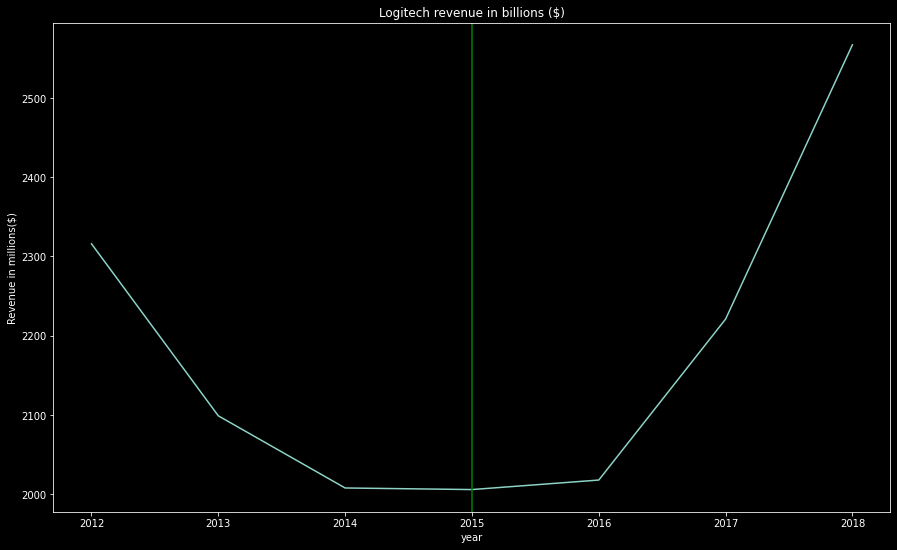

In [10]:
#Logitech company

logitech_dict = { 'year' : ["2012", "2013", "2014", "2015", "2016", "2017", "2018"],
                 'Revenue in millions($)' : [2316, 2099, 2008, 2006, 2018, 2221, 2567]}

df_logi = pd.DataFrame(logitech_dict)
ax = sns.lineplot(df_logi.year, df_logi.iloc[:,1])
ax.axvline("2015",color ="green")
#2015
plt.title('Logitech revenue in billions ($)')
ax

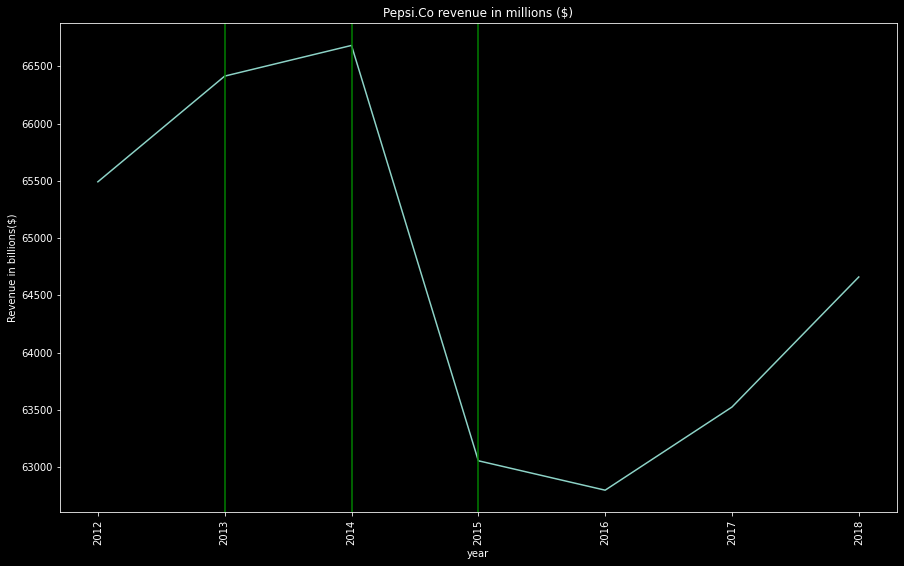

In [11]:
#Pepsi

pep_l = [64661,
63525,
62799,
63056,
66683,
66415,
65492]

pep_l = pep_l[::-1]
pep_dict = { 'year' : ["2012", "2013", "2014", "2015", "2016", "2017", "2018"],
                 'Revenue in billions($)' : pep_l}
df_pep = pd.DataFrame(pep_dict)
ax = sns.lineplot(df_pep.year, df_pep.iloc[:,1])
plt.title('Pepsi.Co revenue in millions ($)')
for yr in ['2013','2014', '2015']:
  ax.axvline(yr,color ="green")
ax.tick_params(axis='x', rotation=90)
#2014 and 2015
ax

In [ ]:
grouped_exp1 = dets_exp1.groupby('company')

def get_yr(company, gdf = grouped_exp1, col = 'yor'):
  dat = gdf.get_group(company)
  yr_list = dat[col].unique()
  return yr_list

> # Exp-2

**Hypothesis** : companies which have high carbon emission dont flourish that much 

**Measures**   : compare stock prices b/w high emmitting companys and low emitting companies 

In [ ]:
comp_df = df.dropna(subset = ['company'])
dets = sorted([[ind, rdf.cfp.sum()] for ind, rdf in comp_df.groupby('company')], reverse = False, key = lambda x : x[-1])
dets = np.array(dets)
dets = pd.DataFrame({
    'company' : dets[:, 0],
    'cfp'     : dets[:, 1]
})
px.bar(dets.iloc[-5:], x = 'company', y = 'cfp', title = 'Top 5 companies producing high carbon emission for their products')

In [ ]:
px.bar(dets.iloc[:5], x = 'company', y = 'cfp', title = 'Top 5 companies producing low carbon emission for their products')

In [ ]:
highest_cfp_comp = dets.iloc[-5:, 0].values
i = 3
least_cfp_comp   = dets.iloc[i:5 + i, 0].values
print(' Highest cfp producing companies '.center(70, '='))
print()
for h in highest_cfp_comp:
  print(f"{h} : {get_yr(h, gdf = df.copy().groupby('company'), col = 'year_of_reporting')}")
print()
print(' Least cfp producing companies '.center(70, '='))
print()
for l in least_cfp_comp:
  print(f"{l} : {get_yr(l, gdf = df.copy().groupby('company'), col = 'year_of_reporting')}")

================== Highest cfp producing companies ===================

Arcelor Mittal : [2013]
Hino Motors, Ltd. : [2016]
Volkswagen AG : [2013 2014 2015 2016]
Daimler AG : [2015 2016]
Gamesa Corporación Tecnológica, S.A. : [2015]

=================== Least cfp producing companies ====================

CNX Resources : [2016]
Times Microwave Systems : [2013 2014 2015]
YONYU Plastics (Shanghai) Co.,Ltd : [2014]
SGD Group : [2013]
TETRA PAK : [2013 2014 2015 2016]


### Getting the stock market data for each company

In [ ]:
def line_split(df):
  df['y'] = df.date.apply(lambda x : x.split('-')[0])
  years = []
  for y,rdf in df.groupby('y'):
    date = sorted(rdf.date.values)
    years.append(date[-1])
  return years

In [ ]:
def plot_prices_yahf(company, start, end):
  yahoo_financials = YahooFinancials(company)
  data = yahoo_financials.get_historical_price_data(start_date=start, 
                                                    end_date=end, 
                                                    time_interval='monthly')
  df = pd.DataFrame(data[company]['prices'])
  df = df.drop('date', axis=1).set_index('formatted_date')
  df = df[["close"]]
  df['date'] = df.index
  df.index = np.arange(df.shape[0])

  ax = sns.lineplot(df.date, df.close)
  yrs = line_split(df)
  for yr in yrs:
    ax.axvline(yr,color ="green")
  ax.tick_params(axis='x', rotation=90)
  return ax

### companies which have high carbon footprint

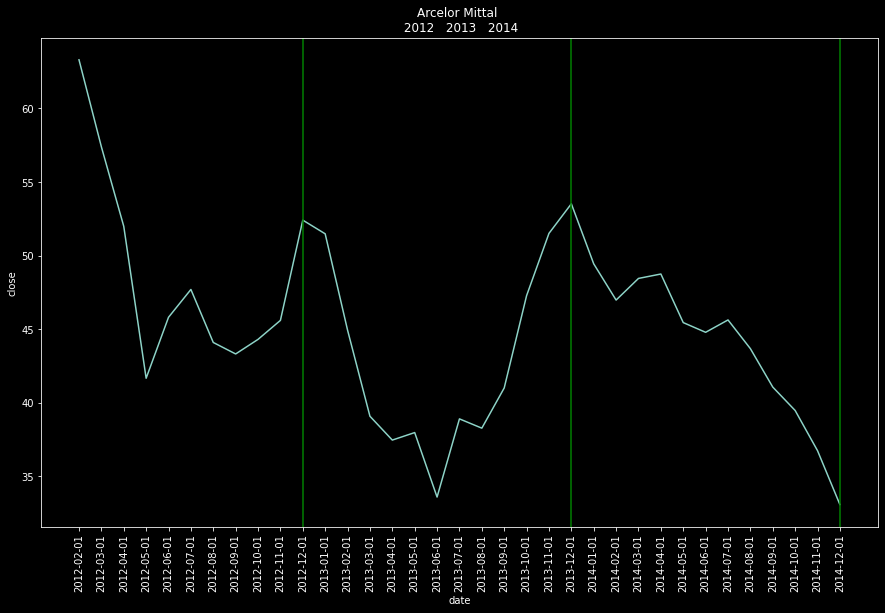

In [ ]:
plt.title('Arcelor Mittal \n 2012   2013   2014')
plot_prices_yahf('MT', '2012-01-11', '2014-12-30');

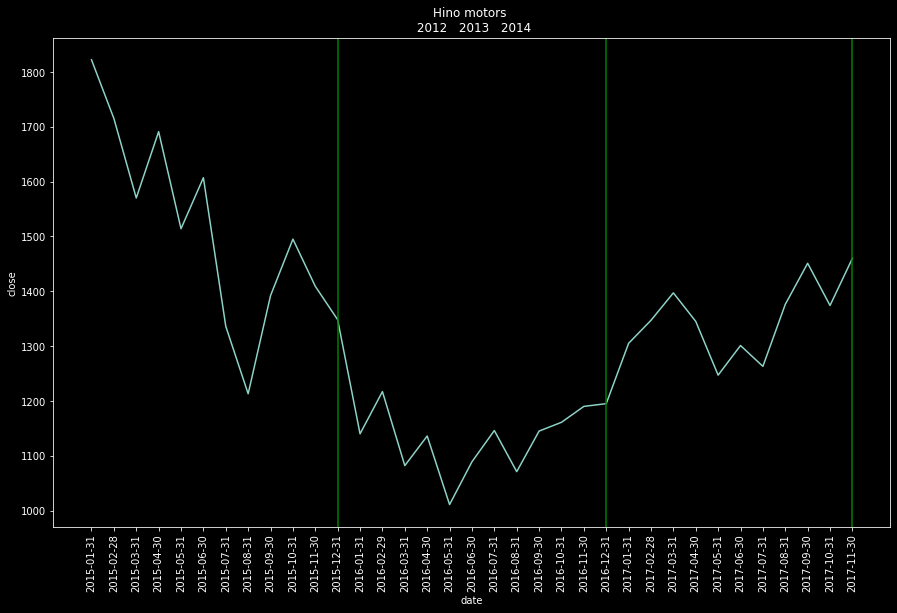

In [ ]:
plt.title('Hino motors \n 2012   2013   2014')
plot_prices_yahf('7205.T', '2015-01-11', '2017-12-30');

### Companies which have low carbon footprint

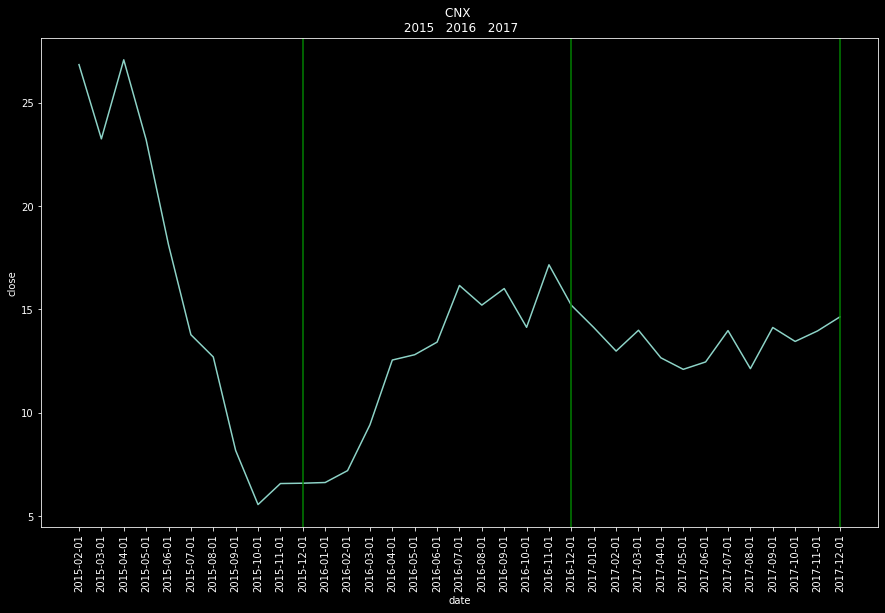

In [ ]:
plt.title('CNX \n 2015   2016   2017')
plot_prices_yahf('CNX', '2015-01-11', '2017-12-30');

> # Exp-3

**Hypothesis** : To check whether products whose countries which emit high/low carbon footprint aligns with the national emission index

**measures**   : extract products whose countries produce high co2

In [ ]:
df.head()

,id,year_of_reporting,product_name,company,country/region,commodity_industry,commodity_sector,product_weight,cfp,carbon_intensity
0,10056.0,2014,frosted flakes(r) cereal,Kellogg Company,usa,"food, beverage & tobacco",food & beverage,0.7485,2.00,2.67
1,10056.0,2015,"frosted flakes, 23 oz, produced in lancaster, ...",Kellogg Company,usa,food & beverage processing,food & beverage,0.7485,2.00,2.67
2,10222.0,2013,office chair,KNOLL INC,usa,capital goods,comm. equipm. & capital goods,20.6800,72.54,3.51
3,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1488.00,13.53
4,10261.0,2017,multifunction printers,"Konica Minolta, Inc.",japan,technology hardware & equipment,"computer, it & telecom",110.0000,1818.00,16.53


## Countries which emit high carbon

In [ ]:
dets = sorted([[ind, np.sum(rdf.cfp)] for ind, rdf in df.groupby('country/region')], reverse = False, key = lambda x : x[1])
dets = np.array(dets)
dets = pd.DataFrame({
    'country' : dets[:, 0],
    'cfp'   : dets[:, 1],
})
px.bar(dets.iloc[-20:], x = 'country', y = 'cfp', title = 'Top 20 countries producing highest carbon emission')

> Countries which produce high carbon emission (products) 

- Spain
- Germany
- Japan
- USA
- Brazil

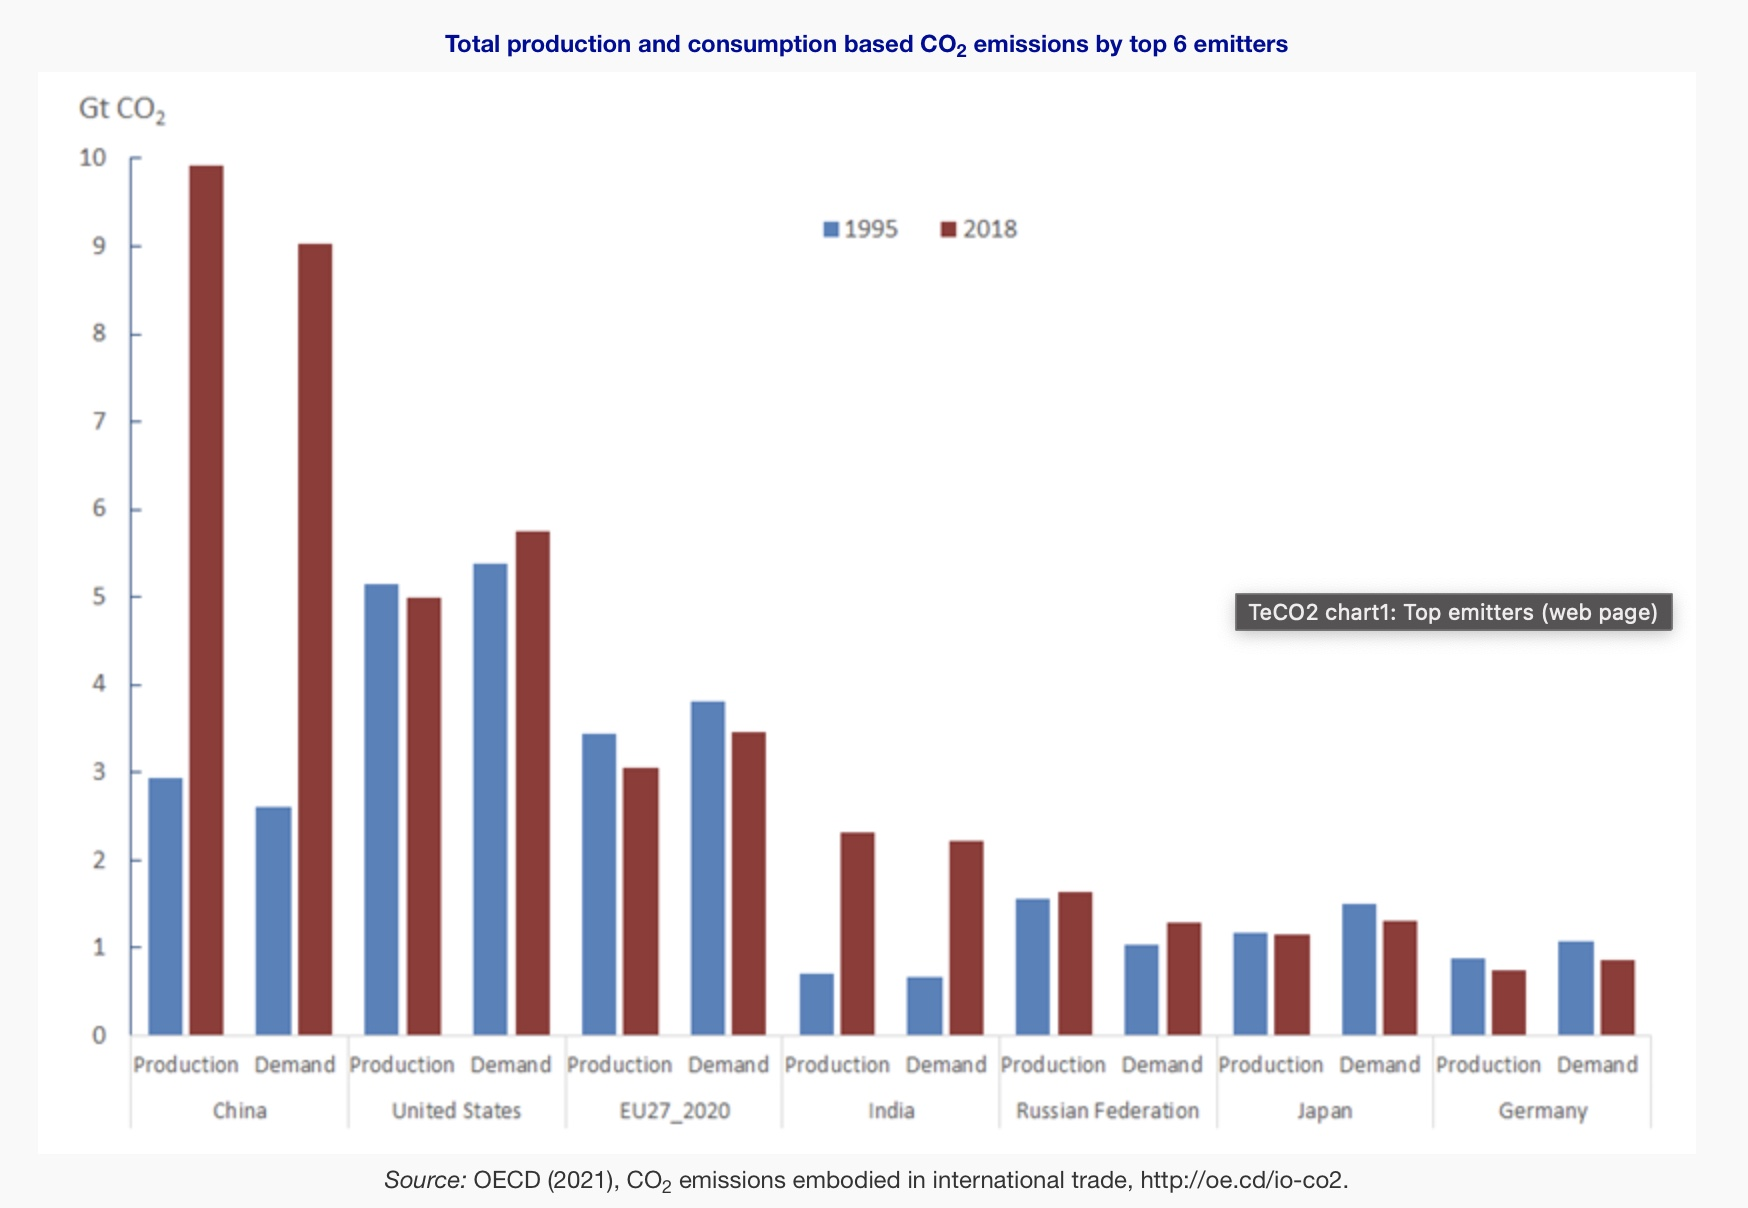

## Most of the countries align with the global chart of co2 production and consumption, so our hypothesis actually checks out 

### Countries producing low cfp

In [ ]:
dets = sorted([[ind, np.sum(rdf.cfp)] for ind, rdf in df.groupby('country/region')], reverse = False, key = lambda x : x[1])
dets = np.array(dets)
dets = pd.DataFrame({
    'country' : dets[:, 0],
    'cfp'   : dets[:, 1],
})
px.bar(dets.iloc[:10,:], x = 'country', y = 'cfp', title = 'Top 10 countries producing lowest carbon emission')

> Countries which produce low carbon emission

- France
- Korea
- Ukraine
- Mauritius
- Serbia

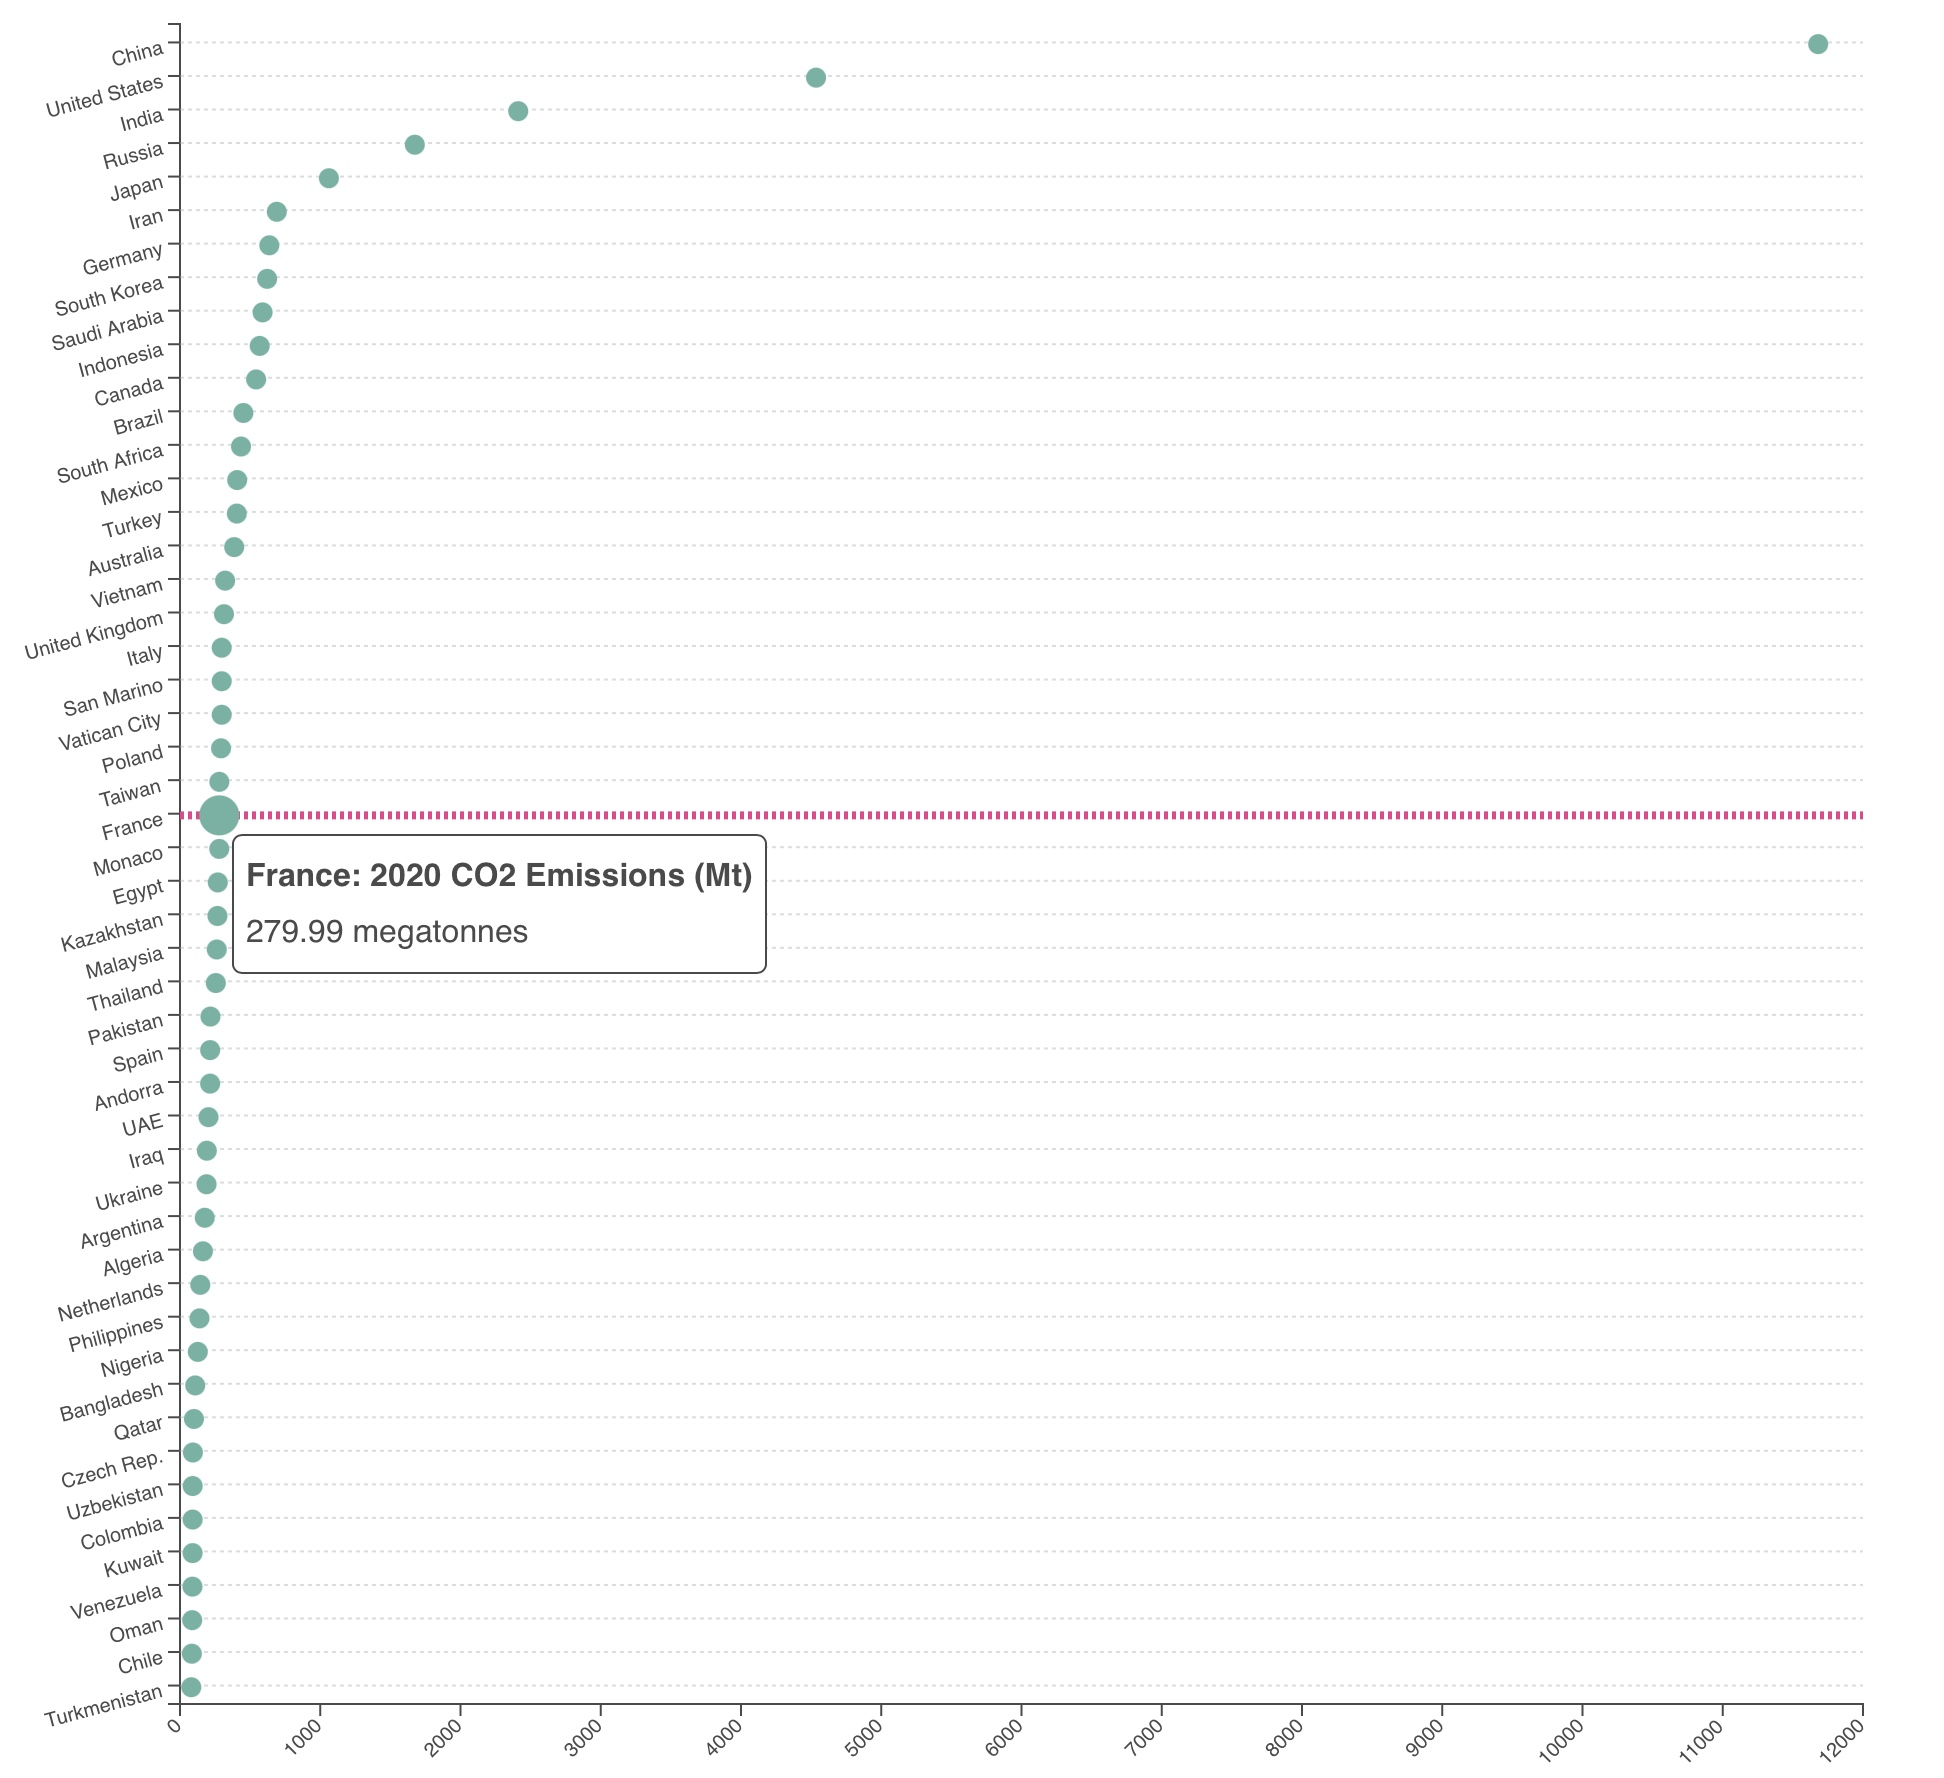